<a href="https://colab.research.google.com/github/Mipritam24/test453/blob/main/Zomato_Data_Analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We need to respond to the subsequent inquiries:

1.Do a greater number of restaurants provide online delivery as opposed to offline services?

2.Which types of restaurants are the most favored by the general public?

3.What price range is preferred by couples for their dinner at restaurants?

###Importe important libraries



In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Create Dataframe

In [47]:
df= pd.read_csv("Zomato-data.csv")
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [48]:
 def handlerate(value):
  value = str(value).split("/")
  value = value[0]
  return value

df["rate"] = df["rate"].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [50]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


Text(0.5, 0, 'Type of Restaurant')

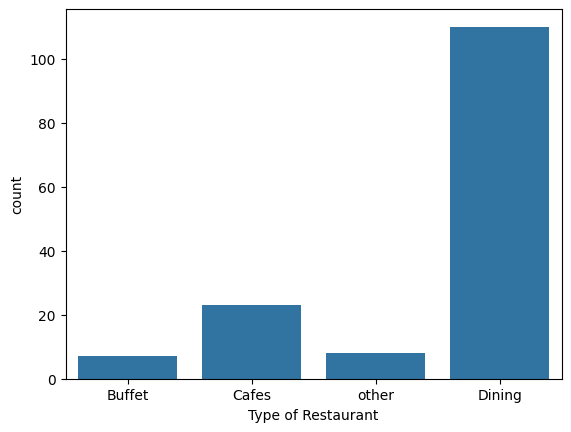

In [51]:
 sns.countplot(x=df['listed_in(type)'])
 plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'votes')

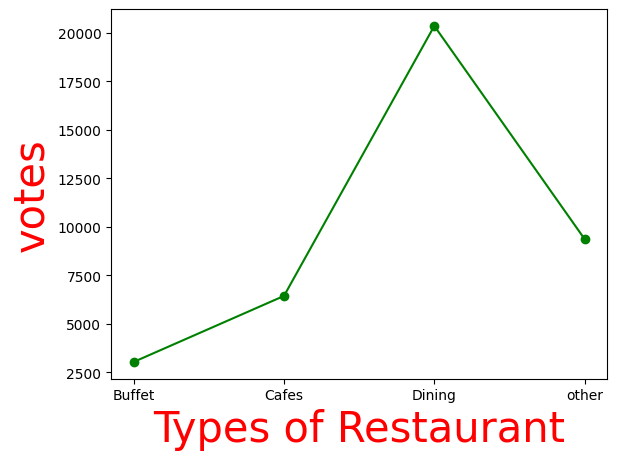

In [52]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes':grouped_data})
plt.plot(result, c= 'green', marker = 'o')
plt.xlabel('Types of Restaurant', c= 'red', size = 30)
plt.ylabel('votes', c = 'red', size = 30)

Conclusion : Dining Restaurants are preferred by most of the popoluation.

In [53]:
max_votes = df['votes'].max()
max_votes = df['votes'].max()
max_votes
Restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print('Restaurant with max votes is :',Restaurant_with_max_votes)

Restaurant with max votes is : 38    Empire Restaurant
Name: name, dtype: object


### Let's explore online order column

<Axes: xlabel='online_order', ylabel='count'>

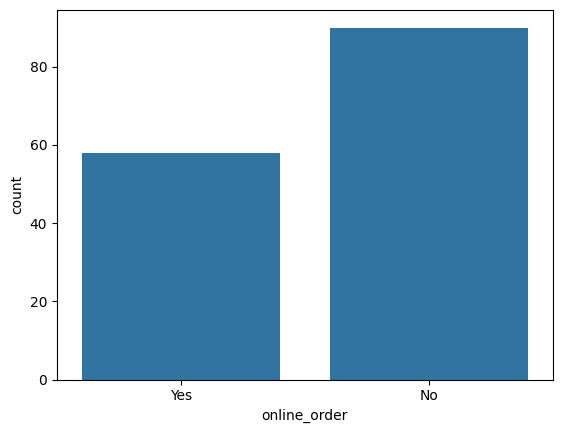

In [54]:
sns.countplot(x=df['online_order'])

### Conclusion : This suggests most of the restaurants does not accept online orders.

## Let's explore the rate column.

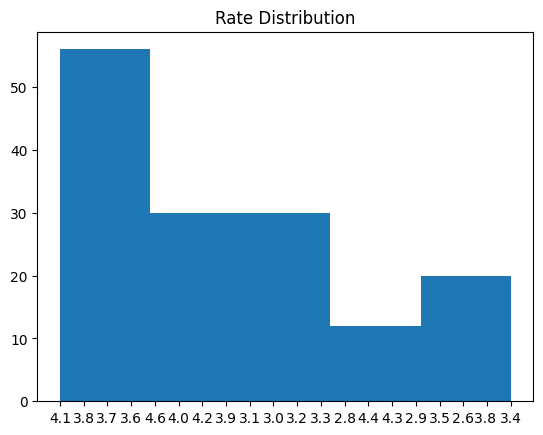

In [55]:
plt.hist(df['rate'], bins= 5)
plt.title('Rate Distribution')
plt.show()

Let's explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

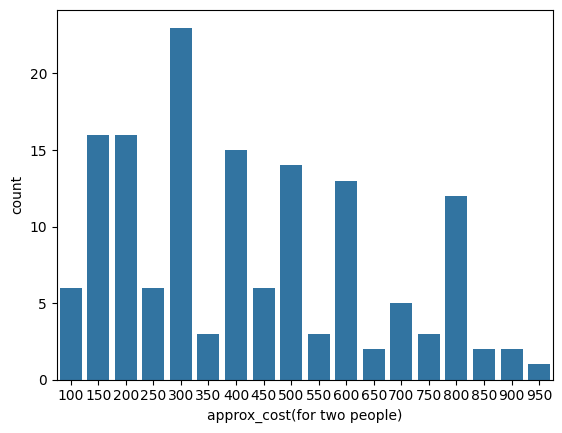

In [56]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion: Most of the couples preferred restaurants with approx cost (for two people) of 300 rupees.

Whether online orders gets more rating or offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

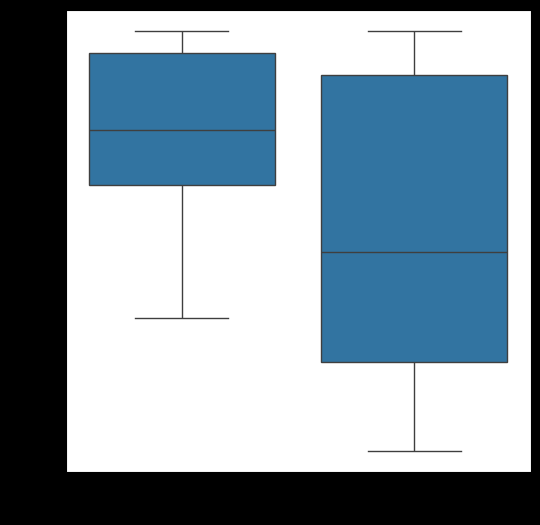

In [57]:
plt.figure(figsize= (6,6),dpi= 100, facecolor = "black", edgecolor = 'red')
sns.boxplot(x='online_order', y = 'rate', data = df)

###Conclusion : Offline orders receive less ratings as compared to online orders.

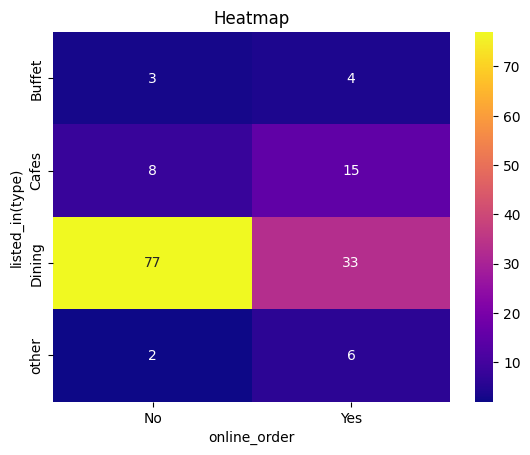

In [68]:
pivot_table= df.pivot_table(index='listed_in(type)',
columns ='online_order', aggfunc='size', fill_value= 0)
sns.heatmap(pivot_table, annot=True, cmap= 'plasma', fmt='g')
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

### Conclusion : Restaurants have more offline orders wheareas cafe has more online orders. So people choose restaurants for dining and cafe for online orders.